**Question 1 - RLC Filter Design**

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

!pip install PySpice

!cat /etc/*release 
!rm libngspice.so*
!rm libngspice.la*
!wget http://www.pcs.cnu.edu/~brash/libngspice.so
!wget http://www.pcs.cnu.edu/~brash/libngspice.la

!rm /usr/local/lib/libngspice.*
!cp /content/libngspice.so /usr/local/lib/libngspice.so.0.0.0
!ln -snf /usr/local/lib/libngspice.so.0.0.0 /usr/local/lib/libngspice.so.0
!ln -snf /usr/local/lib/libngspice.so.0.0.0 /usr/local/lib/libngspice.so
!cp /content/libngspice.la /usr/local/lib/libngspice.la
!ls -al /usr/local/lib
!sudo ldconfig

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
--2020-12-21 18:53:46--  http://www.pcs.cnu.edu/~brash/libngspice.so
Resolving www.pcs.cnu.edu (www.pcs.cnu.edu)... 137.155.2.49
Connecting to www.pcs.cnu.edu (www.pcs.cnu.edu)|137.155.2.49|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.pcs.cnu.edu/~brash/libngspice.so [following]
--2020-12-21 18:53:47--  https://www.pcs.cnu.edu/~brash/libngspice.so
Connecting to www.pcs.cnu.edu (www.pcs.cnu.edu)|137.155.2.49|:443... connected.
HTTP request sent, awa

(a) Design a low pass filter that has cut-off (or resonant) frequency of 100 Hz, and that has a gain of 1 at the resonant frequency. Create a plot of the gain vs. frequency. What is the maximum gain of this filter, and at what frequency does this maximum gain occur?

Maximum gain: 12.076393 at frequency 1548.816650390625 Hz

In [2]:
circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

inductance = 10@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('input', 'inn', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'inn', 1, 200@u_Ω)
circuit1.L(1, 1, 'out5', inductance)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'inn', 2, 100@u_Ω)
circuit1.L(2, 2, 'out1', inductance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
# Q = 2
circuit1.R(3, 'inn', 3, 50@u_Ω)
circuit1.L(3, 3, 'out2', inductance)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
# Q = 4
R4 = circuit1.R(4, 'inn', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)

Capacitor C4

In [3]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

resonant_frequency = 100
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

2020-12-21 18:53:52,356 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - WARNING - spinit was not found
2020-12-21 18:53:52,357 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - Note: can't find init file.
Resonant frequency = 100.0 Hz
Factor of quality = 4.0


2020-12-21 18:53:52,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
Maximum gain: -0.034222834 at frequency 100.0 Hz
2020-12-21 18:53:52,434 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-21 18:53:52,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
Maximum gain: 1.2493352 at frequency 1122.0184326171875 Hz
2020-12-21 18:53:52,453 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-21 18:53:52,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
Maximum gain: 6.29852 at frequency 1479.1083984375 Hz
2020-12-21 18:53:52,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-21 18:53:52,475 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
Maximum gain: 12.076393 at frequency 1548.816650390625 Hz
2020-12-21 18:53:52,477 - PySpice.Prob

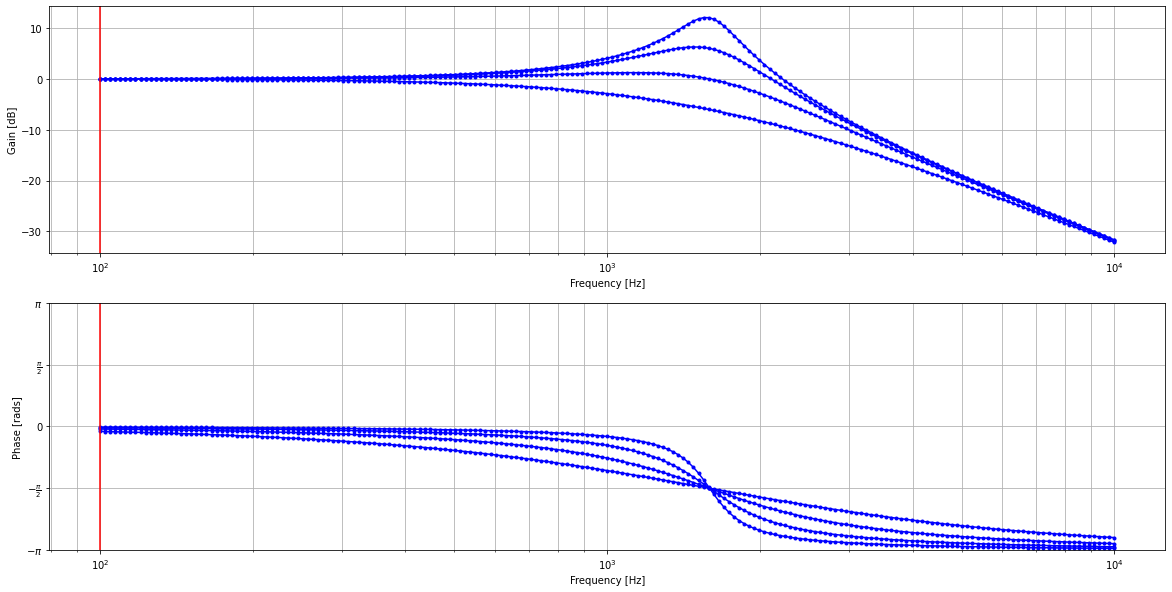

In [4]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    gain = 20*np.log10(np.absolute(analysis1[out]))
    print('Maximum gain:', max(gain), 'at frequency', analysis1.frequency[np.argmax(gain)])
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=gain,
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')

(b) Design a high pass filter that has a cut-off frequency of 1000 Hz, and that has a gain of 1 at the resonant frequency. Create a plot of the gain vs. frequency.

In [5]:
circuit2 = Circuit('Four double-pole High-Pass RLC Filter')

inductance = 10@u_mH
capacitance = 1@u_uF

circuit2.SinusoidalVoltageSource('input', 'inn', circuit2.gnd, amplitude=1@u_V)
# Q = .5
circuit2.R(1, 'inn', 1, 200@u_Ω)
circuit2.L(1, 1, 'out5', inductance)
circuit2.C(1, 'out5', circuit2.gnd, capacitance)
# Q = 1
circuit2.R(2, 'inn', 2, 100@u_Ω)
circuit2.L(2, 2, 'out1', inductance)
circuit2.C(2, 'out1', circuit2.gnd, capacitance)
# Q = 2
circuit2.R(3, 'inn', 3, 50@u_Ω)
circuit2.L(3, 3, 'out2', inductance)
circuit2.C(3, 'out2', circuit2.gnd, capacitance)
# Q = 4
R4 = circuit2.R(4, 'inn', 4, 25@u_Ω)
circuit2.L(4, 4, 'out4', inductance)
circuit2.C(4, 'out4', circuit2.gnd, capacitance)

Capacitor C4

In [6]:
simulator2 = circuit2.simulator(temperature=25, nominal_temperature=25)
analysis2 = simulator2.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

resonant_frequency = 1000
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 1000.0 Hz
Factor of quality = 4.0


2020-12-21 18:53:53,568 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
Maximum gain: -0.034222834 at frequency 100.0 Hz
2020-12-21 18:53:53,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-21 18:53:53,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
Maximum gain: 1.2493352 at frequency 1122.0184326171875 Hz
2020-12-21 18:53:53,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-21 18:53:53,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
Maximum gain: 6.29852 at frequency 1479.1083984375 Hz
2020-12-21 18:53:53,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-21 18:53:53,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
Maximum gain: 12.076393 at frequency 1548.816650390625 Hz
2020-12-21 18:53:53,621 - PySpice.Prob

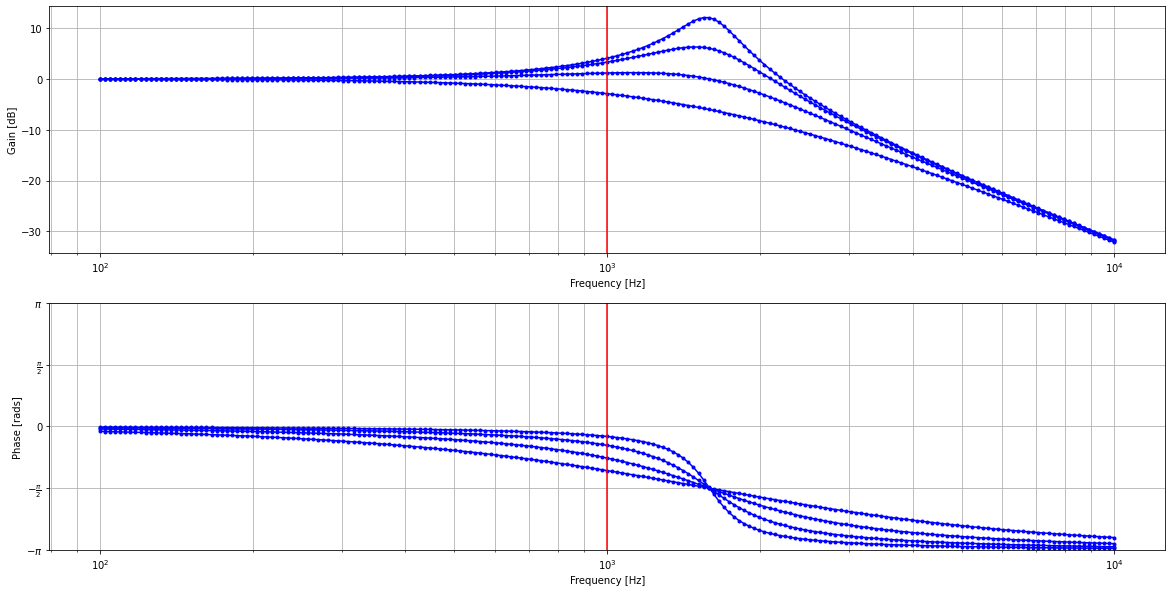

In [7]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))

for out in ('out5', 'out1', 'out2', 'out4'):
    gain = 20*np.log10(np.absolute(analysis2[out]))
    print('Maximum gain:', max(gain), 'at frequency', analysis1.frequency[np.argmax(gain)])
    bode_diagram(axes=axes,
                 frequency=analysis2.frequency,
                 gain=gain,
                 phase=np.angle(analysis2[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')

(c) Design a twin-T notch filter with its "notch" at 60 Hz.

In [8]:
notch_freq = 60@u_Hz                             #f = 1/(2Pi R C)
C = 1 
R = 1/(120 * math.pi * C * notch_freq)
print(R)

C1, C2, C3 = C, C, 2*C
R1, R2, R3 = R, R, R/2

circuit3 = Circuit('Twin-T notch filter')
circuit3.SinusoidalVoltageSource('input', 'inn', circuit3.gnd, amplitude=1@u_V)

circuit3.C('inn', 1, C1)
circuit3.C(1, 'out', C2)
circuit3.R('inn', 2, R1)
circuit3.R(2, 'out', R2)
circuit3.C(2, circuit3.gnd, C3)
circuit3.R(circuit3.gnd, 1, R3)


4.420970641441538e-05


Resistor R0

In [9]:
simulator3 = circuit3.simulator(temperature=25, nominal_temperature=25)

# THIS STILL BREAKS, it appears to be a logic error in the circuit.

# analysis3 = simulator3.ac(start_frequency=60@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

# figure = plt.figure(1, (20, 10))
# plt.title("Bode Diagram")
# axes = (plt.subplot(211), plt.subplot(212))
# for out in ('out1', 'out2'):
#     bode_diagram(axes=axes,
#                  frequency=analysis3.frequency,
#                  gain=20*np.log10(np.absolute(analysis3[out])),
#                  phase=np.angle(analysis3[out], deg=False),
#                  marker='.',
#                  color='blue',
#                  linestyle='-',
#     )
# for axe in axes:
#     axe.axvline(x=resonant_frequency, color='red')

**Question 2 - English Premier League Football**

(a) Make suitable modifications to extract the data into a pandas dataframe. This will involve looking into the details of the BeautifulSoup object (soup) to understand the structure of the html code of the page. This is the most involved part of this question, and is in general non-trivial.

In [10]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import Request

url = Request('https://www.myfootballfacts.com/premier-league-winners/', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(url)
html = webpage.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
records = df[0]

2020-12-21 18:53:55,374 - numexpr.utils._init_num_threads - INFO - NumExpr defaulting to 2 threads.


(b) Construct a plot of total number of points per game played vs. year. Note that in the earlier years of the EPL, teams played more games, and so points per game played is the appropriate variable.

Text(0, 0.5, 'PPG')

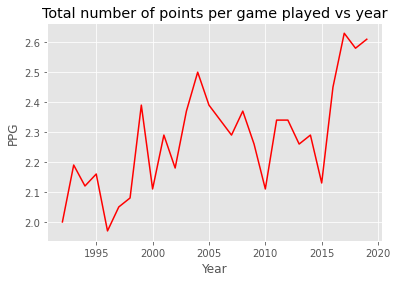

In [11]:
years = [int(x.split("-")[0]) for x in records.Season]
ppg = [float(x) for x in records.PPG]
plt.style.use('ggplot')
plt.plot(years, ppg, color='red')
plt.title('Total number of points per game played vs year')
plt.xlabel('Year')
plt.ylabel('PPG')

(c) Carry out a linear regression fit to the data plotted in part (b) to determine if there is a statistically significant trend. You should be able to use the linear regression fitting code that we developed for other assignments/in-class notebooks.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'PPG')

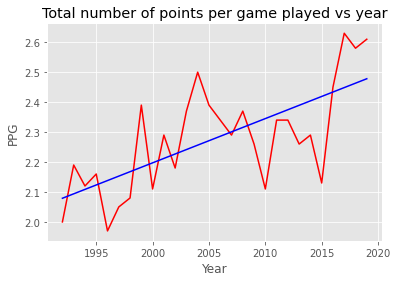

In [12]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

years_ = sm.add_constant(years)
result = sm.OLS(ppg, years_).fit()
yint = result.params[0]
slope = result.params[1]

ppgfit = yint + [slope*y for y in years]
plt.plot(years, ppg, color='red')
plt.plot(years, ppgfit, color='blue')
plt.title('Total number of points per game played vs year')
plt.xlabel('Year')
plt.ylabel('PPG')

**Question 3 - Ideal Gas Simulation**


In [13]:
import matplotlib.animation as animation
import types

k_B = 1.380648e-23 
plt.rcParams["figure.figsize"] = (8,11)
def mod(v):
    return np.sum(v * v, axis=-1)
def pmod(v, T, m):
    return 4 * np.pi * v**2 * np.power(m / (2 * np.pi * k_B * T), 3 / 2) * np.exp(- m * v**2 / (2 * k_B * T))
def V(t, V0, Vf, t_max):
    return V0 + (Vf - V0) * t / t_max

In [14]:
class Simulation(animation.TimedAnimation):
    def __init__(self, n_particles, mass, rad, T, V, max_time, dt=0.2):
        self.PART = n_particles
        self.MASS = mass
        self.RAD = rad
        self.DIAM = 2 * rad
        self.T = T
        if isinstance(V, types.FunctionType):
            self.V0 = V(0)
            self.V = V
            self.Vconst = False
        else:
            self.V0 = V
            self.V = lambda t: V
            self.Vconst = True
        self.L = np.power(self.V0, 1/3) # side length
        self.halfL = self.L / 2
        self.A = 6 * self.L**2 # total surface area
        self.max_time = max_time
        self.dt = dt
        self.Nt = int(max_time / self.dt)
        self.evaluate_properties()
        # velocities histogram
        self.min_v = 0
        self.max_v = self.vmax * 3
        self.dv = 0.2 # (m/s)
        self.Nv = int((self.max_v - self.min_v) / self.dv)
        # pressure
        self.dP = 1 # (s)
        self.NP = int(max_time / self.dP)
        self.init_particles()
        self.init_figures()
        animation.TimedAnimation.__init__(self, self.fig, interval=1, blit=True, repeat=False)

    def evaluate_properties(self):
        self.P = self.PART * k_B * self.T / self.V0
        self.U = 1.5 * self.PART * k_B * self.T
        self.vrms = np.sqrt(3 * k_B * self.T / self.MASS)
        self.vmax = np.sqrt(2 * k_B * self.T / self.MASS)
        self.vmed = np.sqrt(8 * k_B * self.T / (np.pi * self.MASS))

    def init_particles(self):
        self.r = np.random.rand(self.PART, 3) * 2.0 * (self.halfL - self.RAD) -(self.halfL - self.RAD)
        v_polar = np.random.random((self.PART, 2))
        self.v = np.zeros((self.PART, 3))
        self.v[:,0] = np.sin(v_polar[:,0] * np.pi) * np.cos(v_polar[:,1] * 2 * np.pi)
        self.v[:,1] = np.sin(v_polar[:,0] * np.pi) * np.sin(v_polar[:,1] * 2 * np.pi)
        self.v[:,2] = np.cos(v_polar[:,0] * np.pi)
        self.v *= self.vrms

    def init_figures(self):
        self.fig = plt.figure()
        self.ax1 = plt.subplot2grid((3, 1), (0, 0), projection='3d') # 3D axes
        self.ax5 = plt.subplot2grid((3, 1), (1, 0)) # velocities axes
        self.ax6 = plt.subplot2grid((3, 1), (2, 0)) # pressure axes
        # Setup ax1: 3d
        box_limits = [-self.halfL, self.halfL]
        self.ax1.set_xlim3d(box_limits)
        self.ax1.set_xlabel('X')
        self.ax1.set_ylim3d(box_limits)
        self.ax1.set_ylabel('Y')
        self.ax1.set_zlim3d(box_limits)
        self.ax1.set_zlabel('Z')
        self.line_3d = self.ax1.plot([], [], [], ls='None', marker='.')[0]
        self.line_3d_cm = self.ax1.plot([0], [0], [0], ls='None', marker='.', color='r')[0]
        # setup ax5: velocities
        vs = np.linspace(0, self.vmax * 3, 100)
        self.ax5.set_xlabel(r'$v\ (m/s)$')
        self.ax5.set_ylabel(r'$N$')
        self.ax5.plot(vs, self.PART * pmod(vs, self.T, self.MASS) * self.dv, color='r')
        self.vel_x = np.linspace(self.min_v, self.max_v, self.Nv)
        self.vel_y = np.zeros(self.Nv)
        self.line_vel = self.ax5.plot([], [], color='b', lw=0.5)[0]
        # setup ax6: pressure
        self.ax6.set_xlabel(r'$V\ (m^3)$')
        self.ax6.set_ylabel(r'$P\ (Pa)$')
        if self.Vconst:
            pt = self.PART * k_B * self.T / self.V0
            self.ax6.plot([0,self.max_time], [pt, pt], color='r', lw=0.5)
        else:
            Vx = self.V(np.linspace(0, self.max_time, self.Nt))
            self.ax6.plot(Vx, self.PART * k_B * self.T / Vx, color='r', lw=0.5)
        self.ex_p = 0.0 # accumulated exchanged momentum with the walls
        self.last_P = -1
        self.P_x = np.zeros(self.NP)
        self.P_y = np.zeros(self.NP)
        self.line_p = self.ax6.plot([], [], color='b', lw=0.5)[0]
        self._drawn_artists = [self.line_3d, self.line_3d_cm, self.line_vel, self.line_p]

    def update_volume(self, t):
        self.V0 = self.V(t)
        self.L = np.power(self.V0, 1/3)
        self.halfL = self.L / 2
        self.A = 6 * self.L**2
        box_limits = [-self.halfL, self.halfL]
        self.ax1.set_xlim3d(box_limits)
        self.ax1.set_ylim3d(box_limits)
        self.ax1.set_zlim3d(box_limits)

    def _draw_frame(self, t):
        self.update_volume(t)
        # update the position
        self.r += self.dt * self.v
        # check for collisions with other particles
        dists = np.sqrt(mod(self.r - self.r[:,np.newaxis]))
        cols2 = (0 < dists) & (dists < self.DIAM)
        idx_i, idx_j = np.nonzero(cols2)
        # ***possibility to simplify this *** #
        for i, j in zip(idx_i, idx_j):
            if j < i:
                # skip duplications and same particle
                continue 
            rij = self.r[i] - self.r[j]
            d = mod(rij)
            vij = self.v[i] - self.v[j]
            dv = np.dot(vij, rij) * rij / d
            self.v[i] -= dv
            self.v[j] += dv
            # update the positions so they are no longer in contact
            self.r[i] += self.dt * self.v[i]
            self.r[j] += self.dt * self.v[j]
        # check for collisions with the walls
        walls = np.nonzero(np.abs(self.r) + self.RAD > self.halfL)
        self.v[walls] *= -1
        self.r[walls] -= self.RAD * np.sign(self.r[walls])
        # calc the position of the center of masses
        CM = np.sum(self.r, axis=0) / self.PART
        # plot the new coordinates
        self.line_3d.set_data(self.r[:,0], self.r[:,1])
        self.line_3d.set_3d_properties(self.r[:,2])
        self.line_3d_cm.set_data(CM[0], CM[1])
        self.line_3d_cm.set_3d_properties(CM[2])
        # make velocities histogram
        v_mod = np.sqrt(mod(self.v))
        for k in range(self.Nv):
            self.vel_y[k] = np.count_nonzero((k*self.dv < v_mod) & (v_mod < (k + 1)*self.dv))
        self.line_vel.set_data(self.vel_x, self.vel_y)
        # add the momentum exchanged in this iteration to the accumulated one
        self.ex_p += 2 * self.MASS * np.sum(np.abs(self.v[walls]))
        i = int(t / self.dP)
        if i > self.last_P + 1:
            # calculate the pressure after self.dP seconds
            self.last_P = i - 1
            A_avg = self.A if self.Vconst else (self.A + 6 * np.power(self.V(t - self.dP), 2/3)) / 2 
            self.P_x[self.last_P] = (t if self.Vconst else self.V0)
            self.P_y[self.last_P] = self.ex_p / (self.dP * A_avg)
            self.ex_p = 0.0
            self.line_p.set_data(self.P_x[:i], self.P_y[:i])
            self.ax6.set_ylim(np.min(self.P_y[:i]), np.max(self.P_y[:i]))

    def new_frame_seq(self):
        return iter(np.linspace(0, self.max_time, self.Nt))

    def save_data(self):
        with open('pressure.txt', 'w') as outf:
            t = np.linspace(0, self.max_time, self.NP)
            for i in range(self.NP):
                outf.write('%.5f\t%.5f\t%.5g\n' % (t[i], self.P_x[i], self.P_y[i]))
        with open('hist_vel.txt', 'w') as outf:
            for i in range(self.Nv):
              outf.write('%.5f\t%.5g\n' % (self.vel_x[i], self.vel_y[i]))

(a) Modify the simulation so as to have the following structure:

total time = 100 seconds, time step = 0.1 seconds, V = constant = 2.0 m$^2$

Remove the plots of the individual x/y/z coordinates. Make the plot structure a 3 row x 1 column grid, with the 3D position plot in the top panel, the velocity distribution in the middle panel, and the pressure in the bottom panel.

Run the simulation with these new parameters and setup. Do the results for the pressure and velocity distribution make sense?

2020-12-21 18:53:59,233 - matplotlib.animation.save - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2020-12-21 18:53:59,236 - matplotlib.animation._run - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 576x792 -pix_fmt rgba -r 30 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y test_sub.mp4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:149: UserWarning: Attempting to set identical bottom == top == 3.8134338515476756e-18 results in singular transformations; automatically expanding.


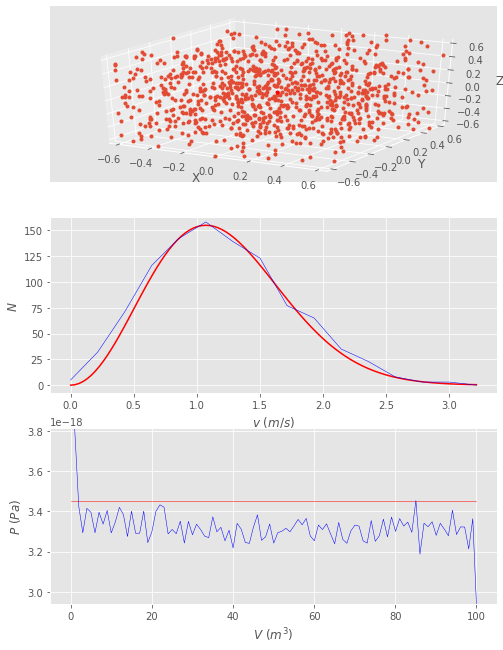

In [15]:
PARTICLES = 1000
MASS = 1.2e-20
RADIUS = 0.01
TEMPERATURE = 500
V0, Vf = 0.5, 15
T_MAX = 100

#               n_particles, mass, rad, T, V, max_time, dt=0.2):
ani = Simulation(PARTICLES, MASS, RADIUS, TEMPERATURE, 2, T_MAX, 0.1)
ani.save('test_sub.mp4', fps=30)
plt.show()
ani.save_data()

In the velocity graph, the blue line of experimental values approaches the expected red curve as time progresses. (The final image only shows the blue curve at max time, but the simulation video shows it starting far away -- with nearly all particles at median velocity -- then approaching the red curve with each time step.) The red curve is a Maxwell-Boltzman distribution, which represents the distribution of speeds among all the particles in an ideal gas. It makes sense that the real distribution of speeds approaches this expected distribution.

As for the pressure graph, the red line represents the constant pressure of an ideal gas expected from maintaining a constant volume (calculated with PV=nRT). The actual pressure results are graphed in blue and are generally below this expected value, with the exception of unusually high pressure at the start of the simulation and unusually low pressure at the end. Other than these exceptions, these pressure measurements make sense because the pressure of a real gas is generally lower than the pressure of an ideal gas. This is due to intermolecular forces (attraction) causing molecules to hit the walls with less force.

b) Modify the simulation to consider the case where the volume is NOT constant. You should only need to change one line in the code, in the final section. There is already a commented line in the code there that will accomplish this.

Re-run the simulation, and comment on the form of the pressure curve.

2020-12-21 18:58:35,755 - matplotlib.animation.save - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2020-12-21 18:58:35,757 - matplotlib.animation._run - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 576x792 -pix_fmt rgba -r 30 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y test_sub2.mp4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:149: UserWarning: Attempting to set identical bottom == top == 1.3328440751072176e-17 results in singular transformations; automatically expanding.


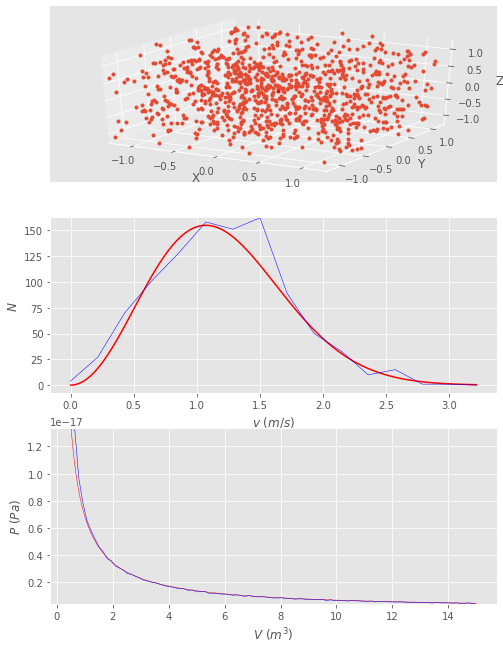

In [16]:
PARTICLES = 1000
MASS = 1.2e-20
RADIUS = 0.01
TEMPERATURE = 500
V0, Vf = 0.5, 15
T_MAX = 100

#               n_particles, mass, rad, T, V, max_time, dt=0.2):
ani2 = Simulation(PARTICLES, MASS, RADIUS, TEMPERATURE, lambda t: V(t, V0, Vf, T_MAX), T_MAX, 0.1)
ani2.save('test_sub2.mp4', fps=30)
plt.show()
ani2.save_data()

The pressure curve in the third graph is an isotherm. This curve makes sense because as volume increases, pressure decreases. This curve would change curvature and position if the temperature of the system were to change. If the temperature were higher, the pressure curve would move up and curve less; if the temperature were lower, the pressure curve would move down and curve more.